In [1]:
import sys 
sys.path.append('../Data_storage/')
sys.path.append('../Code_Base')

In [2]:
import os

In [3]:
from essential_imports import *


import pandas as pd
import numpy as np
import matplotlib as plt
import pandas_profiling
import warnings



In [4]:
from coin_information import *

In [5]:
from statsmodels.tsa.stattools import adfuller 

In [6]:
from matplotlib.pylab import rcParams 

In [7]:
rcParams['figure.figsize'] = 20,10

In [8]:
warnings.filterwarnings('ignore')

## ML DS modules

In [9]:
from statsmodels.tsa.arima_model import ARIMA

In [10]:
ETH = []
for myf in open('../Data_storage/ETC_30min_Freq.txt'):
    ETH.append(myf.replace('\n',''))

In [11]:
ETH_Data = []
for E in ETH:
    E_Temp = pd.read_csv('../Data_storage/Coin_Data_30min/{0}.csv'.format(E))
    ETH_Data.append(E_Temp)

In [12]:
ETH_Data = pd.concat(ETH_Data)

In [13]:
ETH_Data['datetime_real'] = ETH_Data['date'].apply(lambda x: datetime.fromtimestamp(x))

In [14]:
ETH_Data = ETH_Data[ETH_Data['date'] != 0]

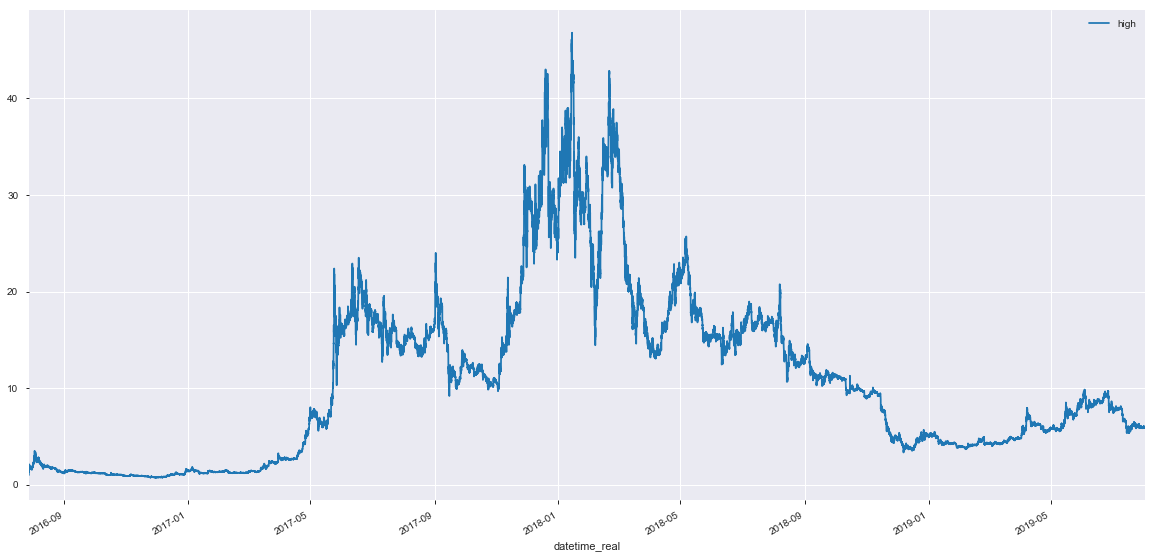

In [15]:
ETH_Data[['high','datetime_real']].set_index('datetime_real').plot(figsize= (20,10))

In [16]:
BTC = []
for myf in open('../Data_storage/BTC_30min_Freq.txt'):
    BTC.append(myf.replace('\n',''))

In [17]:
BTC_Data = []
for E in BTC:
    coin_Temp = pd.read_csv('../Data_storage/Coin_Data_30min/{0}.csv'.format(E))
    BTC_Data.append(coin_Temp)

In [18]:
BTC_Data = pd.concat(BTC_Data)

In [19]:
BTC_Data['datetime_real'] = BTC_Data['date'].apply(lambda x: datetime.fromtimestamp(x))

In [20]:
BTC_Data = BTC_Data[BTC_Data['date'] != 0]

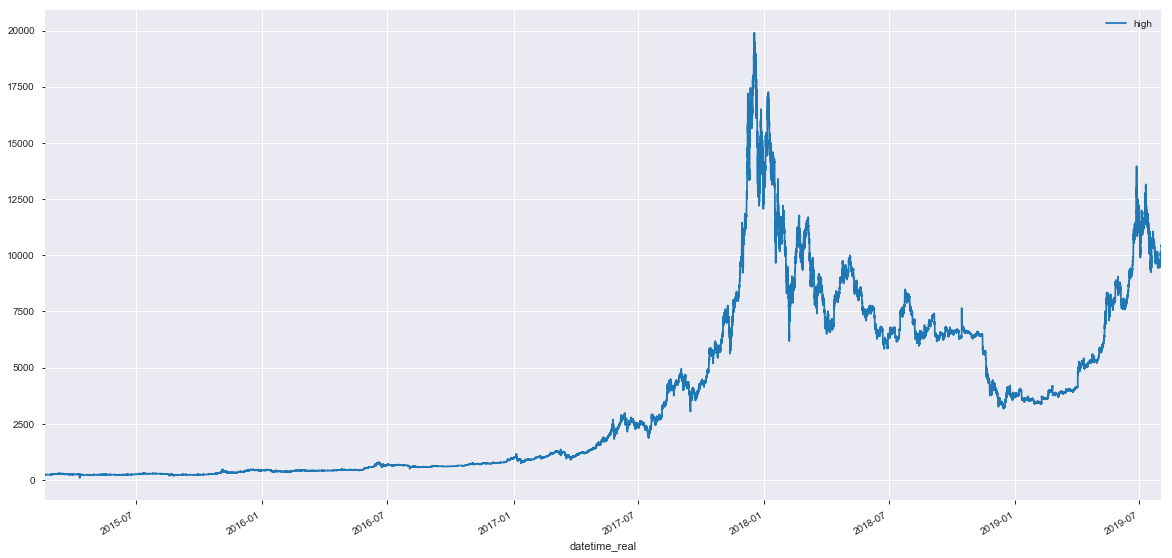

In [21]:
BTC_Data[['high','datetime_real']].set_index('datetime_real').plot(figsize= (20,10))

In [22]:
BTC_Data = BTC_Data.drop(columns = 'Unnamed: 0')

In [23]:
BTC_Data= BTC_Data.drop_duplicates()

In [24]:
# pandas_profiling.ProfileReport(BTC_Data)

In [25]:
def test_stationarity(timeseries):
        #Determing rolling statistics
    rolmean = timeseries.rolling(48).mean()# pd.rolling_mean(timeseries, window=24) # 24 hours on each day
    rolstd = timeseries.rolling(48).std()# pd.rolling_std(timeseries, window=24)
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [26]:
BTC_Data.tail()

,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real
2587,10411.843688,1564695000,10412.543688,10363.761065,10371.040000,7.569329,78616.453010,10386.185539,2019-08-01 22:30:00
2588,10369.303684,1564696800,10425.018269,10362.000000,10410.000000,7.037109,73281.852989,10413.630111,2019-08-01 23:00:00
2589,10365.000000,1564698600,10378.070000,10362.000000,10375.000000,0.635737,6592.862424,10370.417598,2019-08-01 23:30:00
2590,10393.371188,1564700400,10417.000000,10363.500000,10365.000000,16.803258,174840.979376,10405.183378,2019-08-02 00:00:00
2591,10390.600000,1564702200,10391.801814,10365.700000,10391.365263,2.258918,23429.361882,10371.940103,2019-08-02 00:30:00


In [27]:
rcParams['figure.figsize'] = 20,10

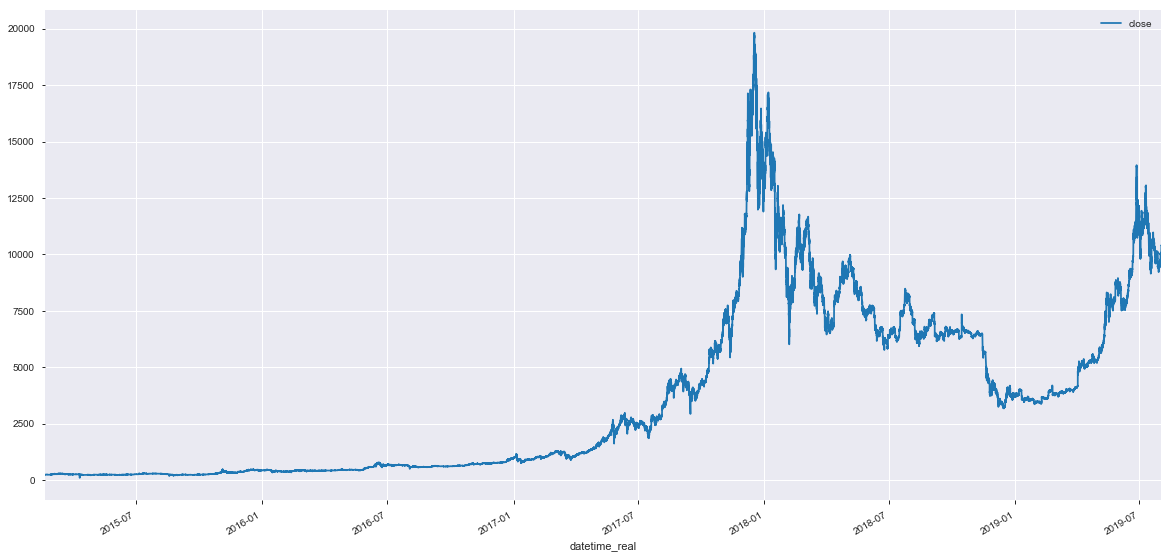

In [28]:
BTC_Data[['close','datetime_real']].set_index('datetime_real').plot()

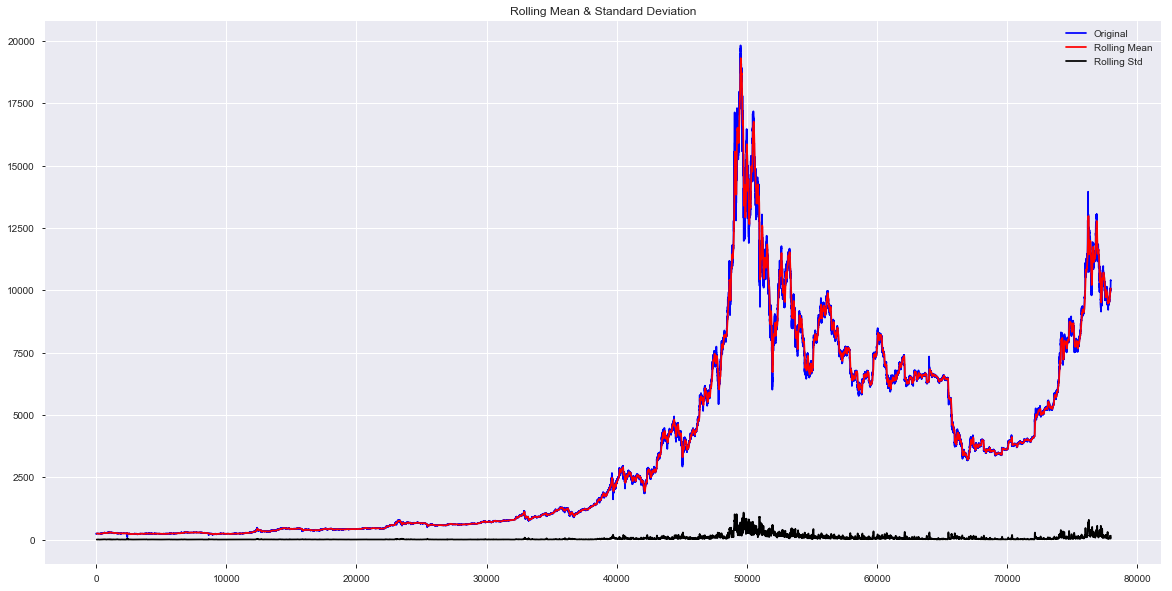

Results of Dickey-Fuller Test:
Test Statistic                    -1.034633
p-value                            0.740424
#Lags Used                        64.000000
Number of Observations Used    77885.000000
Critical Value (1%)               -3.430434
Critical Value (5%)               -2.861577
Critical Value (10%)              -2.566790
dtype: float64


In [29]:
#test_stationarity(train_original['Count'])
test_stationarity(BTC_Data['close'].reset_index()['close'])

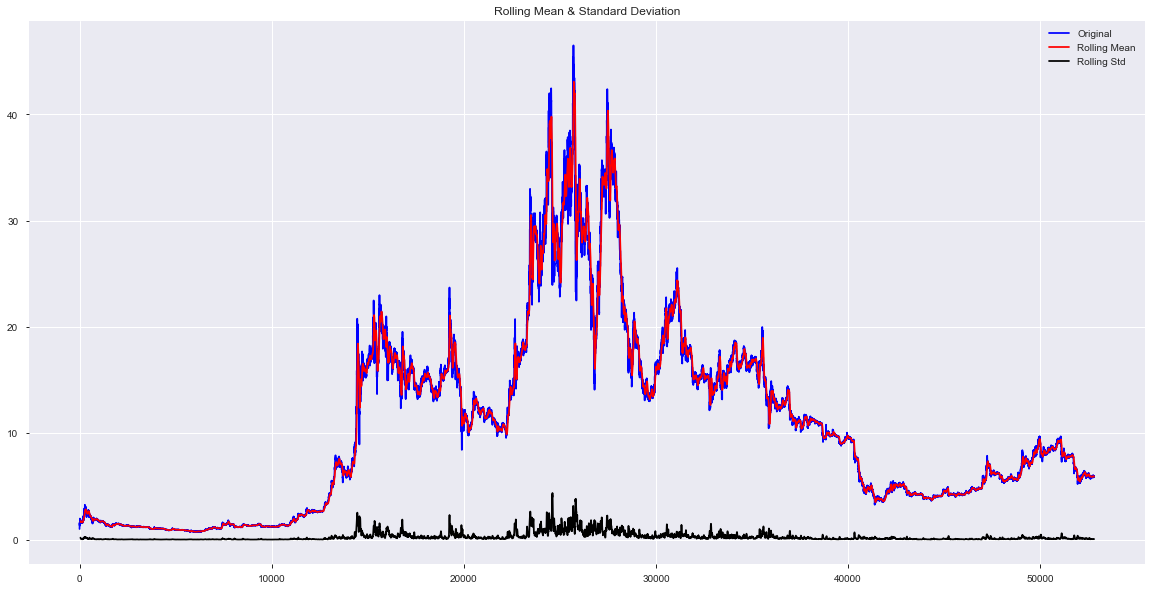

Results of Dickey-Fuller Test:
Test Statistic                    -2.265791
p-value                            0.183238
#Lags Used                        58.000000
Number of Observations Used    52742.000000
Critical Value (1%)               -3.430474
Critical Value (5%)               -2.861595
Critical Value (10%)              -2.566799
dtype: float64


In [30]:
#test_stationarity(train_original['Count'])
test_stationarity(ETH_Data['close'].reset_index()['close'])

## Testing Correlations of BTC, LTC, ETH, XRP

- normalise using :
        - 7D
        - 14D
        - 28D
  rolling averages

## Testing RA of XRP and trading strategy

In [9]:
XRP = []
for myf in open('../Data_storage/XRP_30min_Freq.txt'):
    XRP.append(myf.replace('\n',''))

In [10]:
XRP_Data = []
for E in XRP:
    XRP_Temp = pd.read_csv('../Data_storage/Coin_Data_30min/{0}.csv'.format(E))
    XRP_Data.append(XRP_Temp)

In [11]:
XRP_Data = pd.concat(XRP_Data)

In [12]:
XRP_Data['datetime_real'] = XRP_Data['date'].apply(lambda x: datetime.fromtimestamp(x))

In [13]:
XRP_Data = XRP_Data[XRP_Data['date'] != 0]

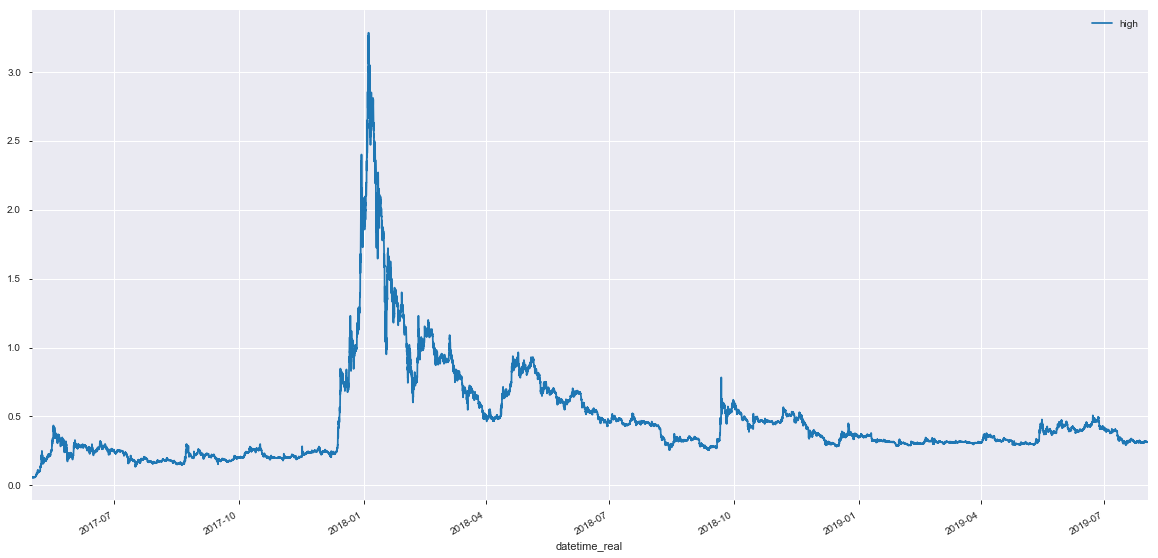

In [14]:
XRP_Data[XRP_Data['datetime_real'] > '2017-05-01'][['high','datetime_real']].set_index('datetime_real').plot(figsize= (20,10))

In [16]:
for Hour in [12,24,24*7]:
    XRP_Data['{}H_RA_on_Close'.format(Hour)] = XRP_Data['close'].rolling( Hour*2).mean()

In [17]:
After_Traction = XRP_Data['datetime_real'] >= '2017-05-01'

In [39]:
brea

NameError: name 'brea' is not defined

### By week

In [40]:
len(XRP_Data[After_Traction])/10

3951.5

In [41]:
# steps = 500
# final_row = int(len(XRP_Data[After_Traction]) - steps)
# for start in np.arange(0,final_row, steps):
#     end = start + steps
# #     print(start, end)
#     XRP_Data[After_Traction][['high','low','close','datetime_real','12H_RA_on_Close','24H_RA_on_Close','168H_RA_on_Close']][int(start) : int(end)].set_index('datetime_real').plot(title = '{} - {}'.format(start, end))

- lowest every 1.5 Days, max 2 days 

^ test this hypothesis

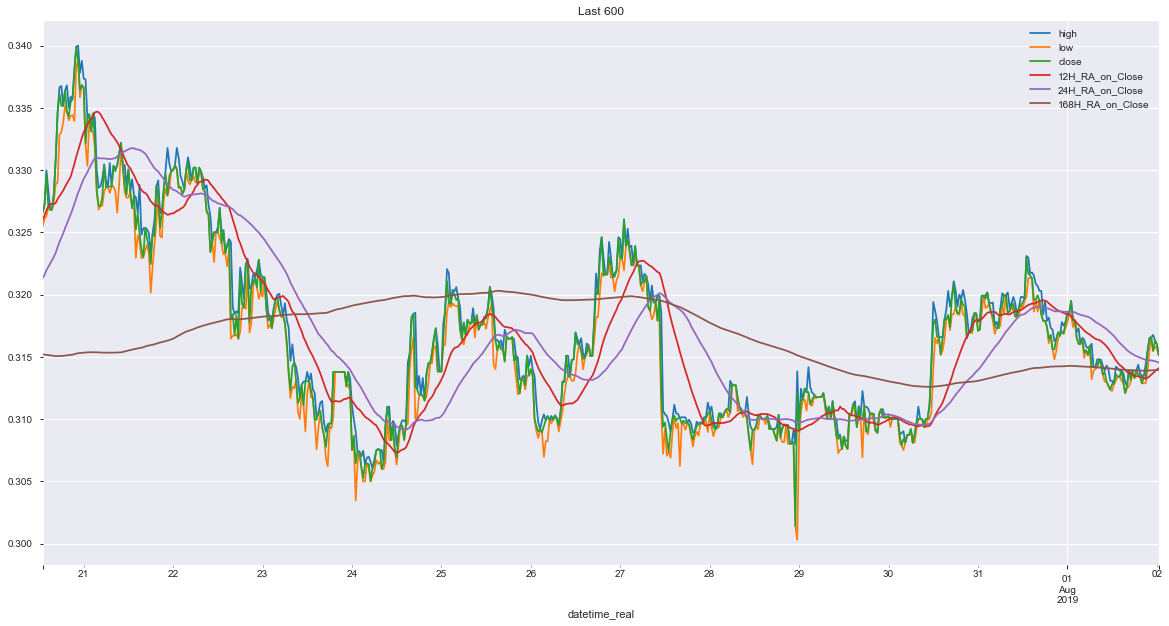

In [42]:
XRP_Data[After_Traction][['high','low','close','datetime_real','12H_RA_on_Close','24H_RA_on_Close','168H_RA_on_Close']][-600:].set_index('datetime_real').plot(title = '{}'.format('Last 600'))

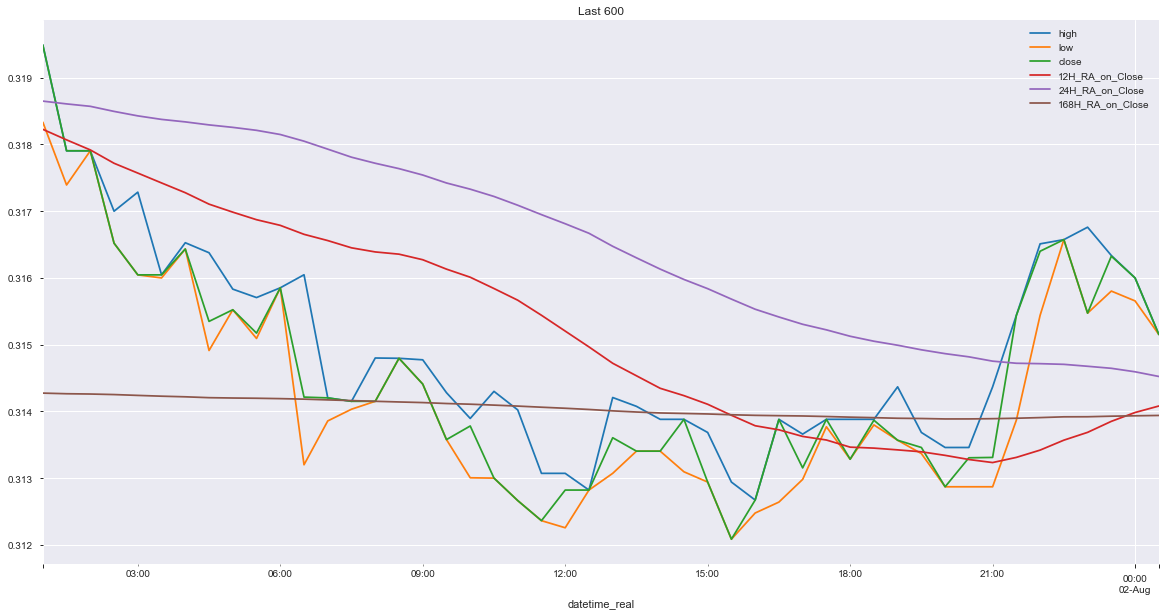

In [43]:
XRP_Data[After_Traction][['high','low','close','datetime_real','12H_RA_on_Close','24H_RA_on_Close','168H_RA_on_Close']][-48:].set_index('datetime_real').plot(title = '{}'.format('Last 600'))

#### A) For ever low point, what's the time it took for it to increase by 6% next, 
#### B) what's the time it took for it to decrease by 5% next

^ given the status, as long as first one is above second one then a profit can be made

if A > B, then more times to get 6% than 5%

In [15]:
def percent_change(percent,date_of_event, value_compare_to, direction, data_supplied ):
    
    
    XRP_Data = data_supplied
    
    "next time it was increased by {0}%".format(percent)
    #print(date_of_event)
    if direction.lower() == 'increase':
        change = value_compare_to* (1+ percent*0.01)
        
        if len(XRP_Data[(XRP_Data['date'] > date_of_event) & (XRP_Data['high'] >= change) ]) == 0:
            return 3456789123
        else:
            return XRP_Data[(XRP_Data['date'] > date_of_event) & (XRP_Data['high'] >= change) ].iloc[[0]]['date'].values[0]
    
    else:
        change = value_compare_to* (1- percent*0.01)
        
        if len(XRP_Data[(XRP_Data['date'] > date_of_event) & (XRP_Data['low'] <= change) ]) == 0:
            return 3456789123
        else:
            return XRP_Data[(XRP_Data['date'] > date_of_event) & (XRP_Data['low'] <= change) ].iloc[[0]]['date'].values[0]

In [49]:
# XRP_Data['Increase_6_percent'] = XRP_Data.apply(lambda x : percent_change(6, x['date'], x['low'], 'increase'), axis = 1)

# XRP_Data['Decrease_5_percent'] = XRP_Data.apply(lambda x : percent_change(5, x['date'], x['low'], 'decrease'), axis = 1)

In [20]:
# for increase in np.array([1,2,3,4,5,6,8,10,15])*0.1:
#     XRP_Data['Increase_{0}_percent'.format(increase)] = XRP_Data.apply(lambda x : percent_change(increase, x['date'], x['low'], 'increase',XRP_Data), axis = 1)
# XRP_Data.to_csv('XRP_Increase_SmallAmount.csv')

In [17]:
for decrease in np.array([1,2,3,4,5,6,8,10,15])*0.1:
    XRP_Data['Decrease_{0}_percent'.format(decrease)] = XRP_Data.apply(lambda x : percent_change(decrease, x['date'], x['low'], 'decrease',XRP_Data), axis = 1)
XRP_Data.to_csv('XRP_Decrease_SmallAmount.csv')

KeyboardInterrupt: 

In [ ]:
len(XRP_Data[(XRP_Data['Increase_6_percent'] - XRP_Data['date']) > 0])

In [ ]:
len(XRP_Data[(XRP_Data['Increase_6_percent'] - XRP_Data['date']) < 0])

In [49]:
XRP_Data.head()

,Unnamed: 0,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real,...,Increase_1_percent,Increase_2_percent,Increase_3_percent,Increase_4_percent,Increase_5_percent,Increase_6_percent,Increase_8_percent,Increase_10_percent,Increase_15_percent,Decrease_15_percent
0,0,0.024997,1424462400,0.024997,0.024997,0.024997,0.1467,0.003667,0.024997,2015-02-20 20:00:00,...,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1424464200
1,1,0.024997,1424464200,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,2015-02-20 20:30:00,...,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1424466000
2,2,0.024997,1424466000,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,2015-02-20 21:00:00,...,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1424467800
3,3,0.024997,1424467800,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,2015-02-20 21:30:00,...,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1424469600
4,4,0.024997,1424469600,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,2015-02-20 22:00:00,...,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1455001200,1424471400


In [54]:
#XRP_Data.to_csv('XRP_NEW_2.csv')

In [21]:
XRP_Data.to_csv('XRP_NEW_decrease_stats.csv')

In [51]:
#new